# Exploratory Data Analysis 

For this project, data from Instacart will be analyzed. 

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

The goal of this project is to clean up the data and prepare a report providing insight into the shopping habits of Instacart customers. Respective questions will be answered, along with a brief explanation of the results.

Data for this project comes from multiple sources and stored in the following files: **/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv,** and **/datasets/order_products.csv**. There is no information about the quality of the data, so you will need to explore it before doing the analysis.

First, you’ll evaluate the quality of the data and see whether its issues are significant. Then, during
data preprocessing, you will try to account for the most critical problems.
Your project will consist of three stages: 1. Data overview 2. Data preprocessing 3. Data analysis 

**DATA OVERVIEW**

Open and explore the data. Load the data and inspect the data  

In [279]:
# import pandas 
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
print(os.getcwd())

C:\Users\Eva Brown\github_projects_datasets


In [32]:
# Define the paths to the CSV
orders_path = 'datasets/instacart_orders.csv'
products_path = 'datasets/products.csv'
aisles_path = 'datasets/aisles.csv'
departments_path = 'datasets/departments.csv'
order_products_path = 'datasets/order_products.csv'

**Load the 'instacart_orders' dataset, inspect the data.**

In [9]:
# Read the CSV
orders_df = pd.read_csv(orders_path, sep=';')

In [51]:
# Preview the data
display(orders_df.head())
display(orders_df.info())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


None

**Load the 'products' dataset, inspect the data.** 

In [14]:
# read a CSV file and convert it into a pandas DataFrame. 
products_df = pd.read_csv(products_path, sep=';')

In [49]:
# Preview the data
display(products_df.head())
display(products_df.info())

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

**Load the 'aisles' data, inspect the data.**

In [23]:
# read a CSV file and convert it into a pandas DataFrame. 
aisles_df = pd.read_csv(aisles_path , sep=';')


In [47]:
# Preview the data
display(aisles_df.head())
display(aisles_df.info())

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

**Load the 'departments' data, inspect the data.** 

In [28]:
# read a CSV file and convert it into a pandas DataFrame. 
dept_df = pd.read_csv(departments_path, sep=';')       


In [45]:
# Preview the data
display(dept_df.head())
display(dept_df.info())

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


None

**ORDER_PRODUCTS_DF** Load the data, inspect the data.

In [35]:
# read a CSV file and convert it into a pandas DataFrame. 
order_products_df = pd.read_csv(order_products_path, sep=';')

In [43]:
# preview data
display(order_products_df.head())
display(order_products_df.info(show_counts=True))

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


None

**DATA PROCESSING**

Verify and fix data types. 

**ORDERS Dataset** 

Verify and fix data types.  Check for missing values and decide how to handle them.

In [55]:
# Ensure all ID columns are integers. Return the dtype object of the underlying data.
print(orders_df.dtypes, '\n')
# Detect missing values for an array-like object. Object to check for null or missing values.
print(orders_df.isna().sum())

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object 

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


Missing Values 'days_since_prior_order'    28819     dtype: int64

**PRODUCTS Dataset** 

Load the data, inspect the data. Check for missing values. 

In [58]:
# Ensure all ID columns are integers. Return the dtype object of the underlying data.
print(products_df.dtypes, '\n') 
# Detect missing values for an array-like object. Object to check for null or missing values.
print(products_df.isna().sum())

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object 

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


**AISLES Dataset** 

Load the data, inspect the data. Check for missing values. 

In [62]:
# Ensure all ID columns are integers. Return the dtype object of the underlying data.
print(aisles_df.dtypes, '\n')
# Detect missing values for an array-like object. Object to check for null or missing values.
print(aisles_df.isna().sum())

aisle_id     int64
aisle       object
dtype: object 

aisle_id    0
aisle       0
dtype: int64


**DEPARTMENTS Dataset** 

Load the data, inspect the data 

In [65]:
# Ensure all ID columns are integers. Return the dtype object of the underlying data.
print(dept_df.dtypes, '\n')
# Detect missing values for an array-like object. Object to check for null or missing values.
print(dept_df.isna().sum())

department_id     int64
department       object
dtype: object 

department_id    0
department       0
dtype: int64


**ORDER_PRODUCTS Dataset** 

Load the data, inspect the data 

In [69]:
# Ensure all ID columns are integers. Return the dtype object of the underlying data.
print(order_products_df.dtypes, '\n')
# Detect missing values for an array-like object. Object to check for null or missing values.
print(order_products_df.isna().sum())

order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object 

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


## Handling Missing Values

**Orders Dataset** 

In [89]:
# Drop the rows where at least one element is missing.
orders_df.fillna({'days_since_prior_order': 0}, inplace=True)

In [91]:
# Fill missing values in 'days_since_prior_order' with the mean
mean_value = orders_df['days_since_prior_order'].mean()
orders_df['days_since_prior_order'] = orders_df['days_since_prior_order'].fillna(mean_value)


In [77]:
# Return a random sample of items from an axis of object, use random_state for reproducibility.
subset_orders_df = orders_df.sample(10, random_state=1369)
subset_orders_df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
369416,591214,179950,27,1,7,14.0
416416,2759035,47038,93,3,12,8.0
113470,2784139,190428,18,0,11,2.0
123314,1023472,114355,12,0,10,7.0
363704,1574034,40616,6,3,16,7.0
294730,53156,137097,13,6,9,30.0
428161,1059970,30620,11,4,0,2.0
335890,3013705,197946,13,1,17,5.0
49301,574774,82002,52,1,14,0.0
158343,2576561,79170,10,2,9,8.0


In [79]:
# Furthur Data Exploration. 
# Descriptive statistics include those that summarize the central tendency,  dispersion and shape of a dataset’s distribution, excluding 'NaN' values.
orders_df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,478967.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,10.433769
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.292125
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [81]:
# Distribution of orders by day of the week
# Return a Series containing the frequency of each distinct row in the Dataframe.
print(orders_df.value_counts('order_dow'))

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60912
4    59810
Name: count, dtype: int64


In [83]:
# Distribution of orders by hour of the day
print(orders_df.value_counts('order_hour_of_day'))

order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: count, dtype: int64


In [85]:
#Time-based Analysis can conversion of 'order_hour_of_day' "%f" will parse all the way up to nanoseconds.
# Convert the timestamp column to datetime
# fixed_date = '2024-01-01'

In [87]:
print(orders_df.value_counts('order_hour_of_day'))

order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: count, dtype: int64


## Find and remove duplicate values (and describe why you make your choices)

### `ORDERS` data frame

In [94]:
# Find duplicate rows
duplicates_rows = orders_df[orders_df.duplicated()]
print("Duplicate Rows:")
print(duplicates_rows)

Duplicate Rows:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220          

In [96]:
# Finding duplicate rows based on specific columns
duplicates_columns = orders_df[orders_df.duplicated(subset=['days_since_prior_order'])]
print("Duplicate Rows Based on Specific Columns:")
print(duplicates_columns)

Duplicate Rows Based on Specific Columns:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
6        2511640   148233            40          3                  8   
9         446014    15356             2          4                  8   
10       1162566    43738            33          4                 11   
12       2276302   190167            21          1                 12   
14       2843219    74699             4          6                 11   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
6                          2.0  
9              

In [98]:
# Return DataFrame with duplicate rows removed. Note: Duplicate rows can skew analyses and lead to incorrect results. 
# Removing them ensures that each order is represented only once. 
orders_df_cleaned = orders_df.drop_duplicates()
print("DataFrame After Removing Duplicates:")
print(orders_df_cleaned.head())

DataFrame After Removing Duplicates:
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [100]:
print(orders_df_cleaned)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [102]:
# Sort by 'user_id' and 'order_number'
sorted_orders = orders_df_cleaned.sort_values(by=['user_id', 'order_number'])
sorted_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
237015,2168274,2,1,2,11,0.0
317143,738281,2,4,2,10,8.0
337248,2030307,4,2,4,11,19.0
146126,329954,4,6,3,12,30.0
220959,157374,5,4,1,18,19.0
...,...,...,...,...,...,...
288343,183408,206208,27,2,14,7.0
207730,2254244,206208,33,6,13,7.0
463119,2017995,206208,34,6,15,7.0
311845,688306,206209,4,1,10,30.0


In [104]:
# Reset index (optional test)
sorted_orders.reset_index(drop=True, inplace=True)

In [106]:
# Check for all orders placed Wednesday at 2:00 AM
# Assuming 'order_dow' is 0-based (0 = Sunday, 1 = Monday, ..., 6 = Saturday)
# and 'order_hour_of_day' is an integer representing the hour in a 24-hour format
# Filter for orders placed on Wednesday (day_of_week = 2) at 2:00 AM (hour = 2)
wednesday_2am_orders = orders_df_cleaned[(orders_df_cleaned['order_dow'] == 2) & (orders_df_cleaned['order_hour_of_day'] == 2)]
wednesday_2am_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


In [108]:
# Double check for duplicate order IDs only
duplicate_order_ids = orders_df_cleaned[orders_df_cleaned.duplicated(subset=['order_id'])]
print(f"Number of duplicate order IDs: {duplicate_order_ids.shape[0]}")

Number of duplicate order IDs: 0


### `PRODUCTS` data frame

In [111]:
# select random subset of rows for quick data inspection and EDA 
products_df.sample(5, random_state=1369)

,product_id,product_name,aisle_id,department_id
43246,43247,One Mixed Berry Nutritional Shake Drink Mix,65,11
33874,33875,100% Colombian Medium Dark Roast Ground Coffee,26,7
24022,24023,Scented Wipes,56,18
17837,17838,Cream Top Lemon Twist,120,16
24952,24953,Magic Eraser All Purpose Handy Grip Refills,114,17


In [113]:
# initial check for missing values
products_df.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [115]:
missing_values = products_df['product_name'].isnull().sum()
print(f"Number of missing values in 'product_name': {missing_values}")

Number of missing values in 'product_name': 1258


In [117]:
# for the object (string) column, 'NaN' is filled with the value 'Unknown'. Filling Missing Values
products_df['product_name'] = products_df['product_name'].fillna('Unknown')

In [119]:
# Dropping missing values 
products_df.dropna(subset=['product_name'], inplace=True)

In [121]:
# index represents unique values from the 'product_name' column. This helpds understand the frequency 
# each value including 'NaN' (Not a Number) occurs in the column. 
products_df['product_name' ].value_counts(dropna=False)

product_name
Unknown                                  1258
Chocolate Sandwich Cookies                  1
Krinkle Cut Carolina BBQ Potato Chips       1
Fresh Ground Turkey- 85% Lean/15% Fat       1
Organic Unsweetened Ketchup                 1
                                         ... 
Organic Fresh Carrot Chips                  1
Unbleached Jumbo Baking Cups                1
Super Glue Gel Control                      1
3 Cheese Ravioli                            1
BURRITO- STEAK & CHEESE                     1
Name: count, Length: 48437, dtype: int64

In [123]:
#  counts the occurrences of each unique row 
unique_aisles = products_df['aisle_id'].unique()
unique_departments = products_df['department_id'].unique()
unique_product_name = products_df['product_name'].unique()
print(f"Unique aisles: {unique_aisles}")
print(f"Unique departments: {unique_departments}")
print(f"Unique product name: {unique_product_name}")

Unique aisles: [ 61 104  94  38   5  11  98 116 120 115  31 119  74  56 103  35  79  63
  40  20  49  47   3  41 127 121  81 123 107 131 106  69 100  64  78  83
  58  66  87  14 105  22 134  23 111 128  50   9  96  92  89  88 130  26
  77  65  12  95  19   7   6  97   2 112  10  51  13  75  70  93  34  62
  21  29  45 118   4 108  37 109  91  24  67 132  25 129  46  16  52  17
  73 122  42  59 126  33   1   8  82 114 124 117  72 110  85  44  80 101
  84  30  27  90  48 133  53  28  68  43 125  57  15  55  36  54 102  60
  99  18  39  71 113  86  32  76]
Unique departments: [19 13  7  1 11 16 17 18 12  9  8 14 15  4 21  6 20  5  3  2 10]
Unique product name: ['Chocolate Sandwich Cookies' 'All-Seasons Salt'
 'Robust Golden Unsweetened Oolong Tea' ...
 'ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR'
 'SPRING WATER BODY WASH' 'BURRITO- STEAK & CHEESE']


In [125]:
# ID column has data type 'int64' (integer)
products_df.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [127]:
# Find duplicate rows
product_duplicates_rows = products_df[products_df.duplicated()]
print("Duplicate Rows:")
print(product_duplicates_rows)

Duplicate Rows:
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [129]:
# Check for just duplicate product IDs
duplicate_product_ids = products_df[products_df.duplicated(subset=['product_id'])]
print("Duplicate Rows Based on Specific Columns:")
print(duplicate_product_ids)

Duplicate Rows Based on Specific Columns:
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [131]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_df['lowercase_product_name'] = products_df['product_name'].str.lower()
duplicate_product_names = products_df['lowercase_product_name'].duplicated().sum()
print(f"Number of duplicate product names (case-insensitive): {duplicate_product_names}")

Number of duplicate product names (case-insensitive): 1361


In [133]:
# Check for duplicate product names that aren't missing
non_missing_product_names = products_df[products_df['product_name'] != 'Unknown']
duplicate_non_missing_names = non_missing_product_names['lowercase_product_name'].duplicated().sum()
print(f"Number of duplicate product names that aren't missing: {duplicate_non_missing_names}")

Number of duplicate product names that aren't missing: 104


In [135]:
# Return DataFrame with duplicate rows removed. Note: Duplicate rows can skew analyses and lead to incorrect results. 
# Removing them ensures that each order is represented only once. 
products_df_cleaned = products_df.drop_duplicates()
print("DataFrame After Removing Duplicates:")
print(products_df_cleaned.head())

DataFrame After Removing Duplicates:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id                             lowercase_product_name  
0             19                         chocolate sandwich cookies  
1             13                                   all-seasons salt  
2              7               robust golden unsweetened oolong tea  
3              1  smart ones classic favorites mini rigatoni wit...  
4             13                          green chile anytime sauce  


In [137]:
print(products_df_cleaned)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  \
0            61             19   
1           104             13   
2            94              7   

In [139]:
products_summary = products_df_cleaned.describe(include='all')
print(products_summary)

          product_id product_name      aisle_id  department_id  \
count   49694.000000        49694  49694.000000   49694.000000   
unique           NaN        48437           NaN            NaN   
top              NaN      Unknown           NaN            NaN   
freq             NaN         1258           NaN            NaN   
mean    24847.500000          NaN     67.773192      11.728478   
std     14345.566475          NaN     38.317265       5.850314   
min         1.000000          NaN      1.000000       1.000000   
25%     12424.250000          NaN     35.000000       7.000000   
50%     24847.500000          NaN     69.000000      13.000000   
75%     37270.750000          NaN    100.000000      17.000000   
max     49694.000000          NaN    134.000000      21.000000   

       lowercase_product_name  
count                   49694  
unique                  48333  
top                   unknown  
freq                     1258  
mean                      NaN  
std            

### `DEPARTMENTS` data frame

In [144]:
# select random subset of rows for quick data inspection and EDA 
dept_df.sample(5, random_state=1369)

,department_id,department
0,1,frozen
19,20,deli
17,18,babies
1,2,other
8,9,dry goods pasta


In [146]:
# obtain summary of orders_df, including counts of non-null entries in each column. 
dept_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [148]:
# quick view to confirm how many missing values are in each column
dept_df.isna().sum()

department_id    0
department       0
dtype: int64

In [150]:
# ID column has data type 'int64' (integer)
dept_df.dtypes

department_id     int64
department       object
dtype: object

In [152]:
# Check for duplicate rows based on all columns
duplicates = dept_df.duplicated()
print(dept_df[duplicates])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [154]:
# Remove duplicate rows
dept_df_cleaned = dept_df.drop_duplicates()

In [156]:
# Check for duplicate department_id values
duplicates_by_id = dept_df['department_id'].duplicated(keep=False)

# Display duplicate department_ids
print(dept_df[duplicates_by_id])

Empty DataFrame
Columns: [department_id, department]
Index: []


### `AISLES` dataframe

In [160]:
# select random subset of rows for quick data inspection and EDA 
aisles_df.sample(5, random_state=1369)

,aisle_id,aisle
16,17,baking ingredients
41,42,frozen vegan vegetarian
127,128,tortillas flat bread
76,77,soft drinks
107,108,other creams cheeses


In [162]:
# obtain summary of orders_df, including counts of non-null entries in each column. 
aisles_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [164]:
# quick view to confirm how many missing values are in each column
aisles_df.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [166]:
# ID column has data type 'int64' (integer)
aisles_df.dtypes

aisle_id     int64
aisle       object
dtype: object

In [168]:
# Check for duplicate rows
duplicate_rows = aisles_df[aisles_df.duplicated()]
duplicate_rows

,aisle_id,aisle


In [170]:
# Remove duplicate rows
aisles_df_cleaned = aisles_df.drop_duplicates()
aisles_df_cleaned.shape

(134, 2)

In [172]:
aisles_df_cleaned.duplicated().sum()

0

### `ORDER_PRODUCTS` DataFrame

In [175]:
# select random subset of rows for quick data inspection and EDA 
order_products_df.sample(5, random_state=1369)

,order_id,product_id,add_to_cart_order,reordered
1244166,2533873,44560,11.0,1
1463143,156772,8743,8.0,1
1276391,1174798,15613,4.0,0
1564452,2225339,13870,11.0,0
272753,612387,47492,4.0,0


In [177]:
# obtain summary of orders_df, including counts of non-null entries in each column. 
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [179]:
# quick view to confirm how many missing values are in each column
order_products_df.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [181]:
# address missing values in 'add_to_cart_order' 
order_products_df = order_products_df.dropna(subset=['add_to_cart_order'])
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('int64')
order_products_df

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
...,...,...,...,...
4545002,577211,15290,12,1
4545003,1219554,21914,9,0
4545004,692640,47766,4,1
4545005,319435,691,8,1


In [183]:
#  counts the occurrences of each unique row 
order_products_df.value_counts()

order_id  product_id  add_to_cart_order  reordered
4         10054       5                  1            1
2277733   35233       5                  1            1
2277734   15233       4                  1            1
          11471       2                  1            1
          6374        3                  1            1
                                                     ..
1145037   26790       21                 1            1
          27767       10                 1            1
          32086       16                 0            1
          33572       5                  1            1
3421079   30136       1                  0            1
Name: count, Length: 4544171, dtype: int64

In [184]:
order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4544171 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 173.3 MB


In [185]:
# ID column has data type 'int64' (integer)
order_products_df.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [186]:
# Check for fully duplicate rows
duplicate_rows = order_products_df[order_products_df.duplicated(keep='first')]
num_duplicates = len(duplicate_rows)
print(f"Number of fully duplicate rows: {num_duplicates}")

Number of fully duplicate rows: 0


In [191]:
# Double check for any other tricky duplicates
# Check for duplicates based on a subset of columns
subset_duplicates = order_products_df[order_products_df.duplicated(subset=['order_id', 'product_id'], keep='first')]

# Count of subset duplicates
num_subset_duplicates = len(subset_duplicates)
print(f"Number of subset duplicates (based on order_id and product_id): {num_subset_duplicates}")


Number of subset duplicates (based on order_id and product_id): 0


In [193]:
# Check the range and unique values in add_to_cart_order and reordered
print(order_products_df['add_to_cart_order'].describe())
print(order_products_df['reordered'].value_counts())

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64
reordered
1    2683519
0    1860652
Name: count, dtype: int64


## Find and remove missing values


### `PRODUCTS` DataFrame

In [196]:
# Are all of the missing product names associated with aisle ID 100?
unknown_product_names = products_df_cleaned[products_df_cleaned['product_name'] == 'Unknown']
unknown_product_names

,product_id,product_name,aisle_id,department_id,lowercase_product_name
37,38,Unknown,100,21,unknown
71,72,Unknown,100,21,unknown
109,110,Unknown,100,21,unknown
296,297,Unknown,100,21,unknown
416,417,Unknown,100,21,unknown
...,...,...,...,...,...
49552,49553,Unknown,100,21,unknown
49574,49575,Unknown,100,21,unknown
49640,49641,Unknown,100,21,unknown
49663,49664,Unknown,100,21,unknown


The rows are filtered where product_name is 'Unknown'. This creates a DF that includes only the rows where 'product_name' is 'Unknown'.

In [199]:
#This checks if all 'aisle_id' values in the filered DF are 100.
all_unknown_is_aisle_100 = (products_df_cleaned['aisle_id'] == 100).all()
print(f"Are all missing product names associated with aisle ID 100? {all_unknown_is_aisle_100}")

Are all missing product names associated with aisle ID 100? False


The output 'True', show that all missing product names are indeed associated with aisle ID 100. If the output was 'False' it means that not all of the rows with missing 'product_name' values are associated with 'aisle_id' 100.  In other words, there are some rows where 'product_name' is 'Unknown' but the aisle_id is not 100.

In [202]:
unknown_product_aisles = products_df_cleaned['aisle_id'].value_counts()
print("Aisle IDs with missing product names:")
unknown_product_aisles

Aisle IDs with missing product names:


aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: count, Length: 134, dtype: int64

Further invesigation shows which aisle IDs are associated with missing product names and how the distribution is across the different aisle IDs.

In [205]:
# Are all of the missing product names associated with department ID 21?
all_unknown_is_aisle_21 = (products_df_cleaned['department_id'] == 21).all()
print(f"Are all missing product names associated with aisle ID 21? {all_unknown_is_aisle_21}")

Are all missing product names associated with aisle ID 21? False


In [207]:
#Get the department IDs where product_name is 'Unknown'
unknown_product_departments = products_df_cleaned['department_id'].value_counts()
print("Department IDs with missing product names:")
unknown_product_departments

Department IDs with missing product names:


department_id
11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: count, dtype: int64

In [209]:
# What is this aisle and department?
# Find unique aisle_ids associated with missing product names
unique_aisle_ids = products_df_cleaned['aisle_id'].unique()
print("Unique aisle IDs associated with missing product names:")
print(unique_aisle_ids)

Unique aisle IDs associated with missing product names:
[ 61 104  94  38   5  11  98 116 120 115  31 119  74  56 103  35  79  63
  40  20  49  47   3  41 127 121  81 123 107 131 106  69 100  64  78  83
  58  66  87  14 105  22 134  23 111 128  50   9  96  92  89  88 130  26
  77  65  12  95  19   7   6  97   2 112  10  51  13  75  70  93  34  62
  21  29  45 118   4 108  37 109  91  24  67 132  25 129  46  16  52  17
  73 122  42  59 126  33   1   8  82 114 124 117  72 110  85  44  80 101
  84  30  27  90  48 133  53  28  68  43 125  57  15  55  36  54 102  60
  99  18  39  71 113  86  32  76]


In [211]:
aisle_info = aisles_df[aisles_df['aisle_id'].isin(unique_aisle_ids)]
print("Aisles associates with missing product names:")
print(aisle_info)

Aisles associates with missing product names:
     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


In [213]:
# Find unique department_ids associated with missing product names
unique_department_ids = products_df_cleaned['department_id'].unique()
print("Unique department IDs associated with missing product names:")
print(unique_department_ids)

Unique department IDs associated with missing product names:
[19 13  7  1 11 16 17 18 12  9  8 14 15  4 21  6 20  5  3  2 10]


In [215]:
# Fill missing product names with 'Unknown'
# products_df['product_name'] = products_df['product_name'].fillna('Unknown')

In [217]:
# Display details of products with missing names
missing_name_products = products_df_cleaned[products_df_cleaned['product_name'] == 'Unknown']
print("Details of products with missing names:")
print(missing_name_products)

Details of products with missing names:
       product_id product_name  aisle_id  department_id lowercase_product_name
37             38      Unknown       100             21                unknown
71             72      Unknown       100             21                unknown
109           110      Unknown       100             21                unknown
296           297      Unknown       100             21                unknown
416           417      Unknown       100             21                unknown
...           ...          ...       ...            ...                    ...
49552       49553      Unknown       100             21                unknown
49574       49575      Unknown       100             21                unknown
49640       49641      Unknown       100             21                unknown
49663       49664      Unknown       100             21                unknown
49668       49669      Unknown       100             21                unknown

[1258 rows 

In [219]:
aisle_counts = missing_name_products['aisle_id'].value_counts()
department_counts = missing_name_products['department_id'].value_counts()
print(f"Count of missing product names by aisle:")
print(aisle_counts)
print("\nCount of missing product names by department:")
print(department_counts)

Count of missing product names by aisle:
aisle_id
100    1258
Name: count, dtype: int64

Count of missing product names by department:
department_id
21    1258
Name: count, dtype: int64


In [222]:
print("Summary statistics for missing product names:")
print(missing_name_products.describe(include='all'))

Summary statistics for missing product names:
          product_id product_name  aisle_id  department_id  \
count    1258.000000         1258    1258.0         1258.0   
unique           NaN            1       NaN            NaN   
top              NaN      Unknown       NaN            NaN   
freq             NaN         1258       NaN            NaN   
mean    25203.929253          NaN     100.0           21.0   
std     14292.033509          NaN       0.0            0.0   
min        38.000000          NaN     100.0           21.0   
25%     12385.000000          NaN     100.0           21.0   
50%     25224.000000          NaN     100.0           21.0   
75%     38023.750000          NaN     100.0           21.0   
max     49669.000000          NaN     100.0           21.0   

       lowercase_product_name  
count                    1258  
unique                      1  
top                   unknown  
freq                     1258  
mean                      NaN  
std              

### `ORDERS` DataFrame

In [225]:
# Sort by user_id and order_number to determine the first order for each customer
orders_df_sorted = orders_df.sort_values(by=['user_id', 'order_number'])
orders_df_sorted['is_first_order'] = orders_df_sorted.groupby('user_id').cumcount() == 0

In [228]:
# Are there any missing values where it's not a customer's first order?
# Filter for non-first orders
non_first_orders = orders_df_sorted[~orders_df_sorted['is_first_order']]

# Check for missing values in 'days_since_prior_order'
missing_in_non_first_orders = non_first_orders['days_since_prior_order'].isna().sum()
print(f"Number of missing values in 'days_since_prior_order' where it is not the customer's first order: {missing_in_non_first_orders}")

Number of missing values in 'days_since_prior_order' where it is not the customer's first order: 0


### `ORDER_PRODUCTS` DataFrame

In [231]:
# What are the min and max values in this column?
min_value = order_products_df['add_to_cart_order'].min()
max_value = order_products_df['add_to_cart_order'].max()
print(f"Minimum value in 'add_to_cart_order': {min_value}")
print(f"Maximum value in 'add_to_cart_order': {max_value}")

Minimum value in 'add_to_cart_order': 1
Maximum value in 'add_to_cart_order': 64


In [233]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# First, idenitfy orders with missing 'add_to_cart_order' values
orders_with_missing_values = order_products_df[order_products_df['add_to_cart_order'].isna()]
orders_with_missing_values

,order_id,product_id,add_to_cart_order,reordered


In [235]:
#Second, extract unique 'order_id' values
unique_order_ids_with_missing = orders_with_missing_values['order_id'].unique()
unique_order_ids_with_missing

array([], dtype=int64)

In [237]:
# Do all orders with missing values have more than 64 products?
order_counts = orders_with_missing_values.groupby('order_id').size()
orders_with_more_than_64_products = order_counts[order_counts > 64]
all_orders_with_missing_values_have_more_than_64 = len(orders_with_more_than_64_products) == len(order_counts)
print(f"Do all orders with missing values have more than 64 products? {all_orders_with_missing_values_have_more_than_64}")

Do all orders with missing values have more than 64 products? True


In [241]:
# Replace missing values with 999 and convert column to integer type
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('Int64', errors='ignore')

# Check dtype and summary
print(order_products_df['add_to_cart_order'].dtype)
print(order_products_df['add_to_cart_order'].describe())


Int64
count    4544171.0
mean      8.351669
std       7.080368
min            1.0
25%            3.0
50%            6.0
75%           11.0
max           64.0
Name: add_to_cart_order, dtype: Float64


### Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [244]:
# Verify if all 'order_hour_of_day' values are within the range 0 to 23
valid_hours = (orders_df['order_hour_of_day'] >= 0) & (orders_df['order_hour_of_day'] <= 23)
all_valid = valid_hours.all()

print("Are all 'order_hour_of_day' values within the range 0 to 23?")
print(all_valid)

Are all 'order_hour_of_day' values within the range 0 to 23?
True


In [246]:
# Verify if all 'order_dow' values are within the range 0 to 6
valid_dow = (orders_df['order_dow'] >= 0) & (orders_df['order_dow'] <= 6)
all_valid = valid_dow.all()

print("Are all 'order_dow' values within the range 0 to 6?")
print(all_valid) 

Are all 'order_dow' values within the range 0 to 6?
True


In [248]:
# Find rows where 'order_dow' is outside the range 0 to 6
invalid_values = orders_df[~valid_dow]

print("Invalid 'order_dow' values:")
print(invalid_values)

Invalid 'order_dow' values:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [250]:
# Check the data type of 'order_hour_of_day'
print("Current data type of 'order_hour_of_day':", orders_df['order_hour_of_day'].dtype)

Current data type of 'order_hour_of_day': int64


In [252]:
# Convert 'order_hour_of_day' to datetime if not already in datetime format
fixed_date = '2024-01-01'
orders_df['order_hour_of_day'] = pd.to_datetime(fixed_date + ' ' + orders_df['order_hour_of_day'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

print("Data after conversion:")
print(orders_df)

Data after conversion:
        order_id  user_id  order_number  order_dow   order_hour_of_day  \
0        1515936   183418            11          6 2024-01-01 13:00:00   
1        1690866   163593             5          5 2024-01-01 12:00:00   
2        1454967    39980             4          5 2024-01-01 19:00:00   
3        1768857    82516            56          0 2024-01-01 20:00:00   
4        3007858   196724             2          4 2024-01-01 12:00:00   
...          ...      ...           ...        ...                 ...   
478962   3210681     5617             5          1 2024-01-01 14:00:00   
478963   3270802   112087             2          3 2024-01-01 13:00:00   
478964    885349    82944            16          2 2024-01-01 11:00:00   
478965    216274     4391             3          3 2024-01-01 08:00:00   
478966   2071924     1730            18          1 2024-01-01 14:00:00   

        days_since_prior_order  
0                         30.0  
1                     

In [254]:
# Extract the hour from 'order_hour_of_day' for inspection
orders_df['order_hour'] = orders_df['order_hour_of_day'].dt.hour

In [256]:
# Check unique values in 'order_hour_of_day'
unique_hours = orders_df['order_hour_of_day'].unique()
print(f"Unique values in 'order_hour_of_day': {unique_hours}")

Unique values in 'order_hour_of_day': <DatetimeArray>
['2024-01-01 13:00:00', '2024-01-01 12:00:00', '2024-01-01 19:00:00',
 '2024-01-01 20:00:00', '2024-01-01 11:00:00', '2024-01-01 08:00:00',
 '2024-01-01 18:00:00', '2024-01-01 15:00:00', '2024-01-01 16:00:00',
 '2024-01-01 09:00:00', '2024-01-01 22:00:00', '2024-01-01 10:00:00',
 '2024-01-01 00:00:00', '2024-01-01 14:00:00', '2024-01-01 17:00:00',
 '2024-01-01 01:00:00', '2024-01-01 07:00:00', '2024-01-01 06:00:00',
 '2024-01-01 02:00:00', '2024-01-01 21:00:00', '2024-01-01 03:00:00',
 '2024-01-01 23:00:00', '2024-01-01 05:00:00', '2024-01-01 04:00:00']
Length: 24, dtype: datetime64[ns]


In [258]:
# Find the minimum and maximum hour values
min_hour = orders_df['order_hour'].min()
max_hour = orders_df['order_hour'].max()

print(f"Minimum hour value: {min_hour}")
print(f"Maximum hour value: {max_hour}")

Minimum hour value: 0
Maximum hour value: 23


In [260]:
# Check for valid range
# Check if min_hour or max_hour are outside the valid range
if min_hour < 0 or max_hour > 23:
    print("Warning: 'order_hour_of_day' contains values outside the range 0 to 23.")
else:
    print("All hours are within the valid range 0 to 23.")

All hours are within the valid range 0 to 23.


### What time of day do people shop for groceries?

In [263]:
import matplotlib.pyplot as plt

In [264]:
# Count the number of orders placed in each hour
hourly_counts = orders_df['order_hour_of_day'].value_counts().sort_index()
print("Number of orders by hour of the day:")
print(hourly_counts)

Number of orders by hour of the day:
order_hour_of_day
2024-01-01 00:00:00     3180
2024-01-01 01:00:00     1763
2024-01-01 02:00:00     1004
2024-01-01 03:00:00      770
2024-01-01 04:00:00      765
2024-01-01 05:00:00     1371
2024-01-01 06:00:00     4215
2024-01-01 07:00:00    13043
2024-01-01 08:00:00    25024
2024-01-01 09:00:00    35896
2024-01-01 10:00:00    40578
2024-01-01 11:00:00    40032
2024-01-01 12:00:00    38034
2024-01-01 13:00:00    39007
2024-01-01 14:00:00    39631
2024-01-01 15:00:00    39789
2024-01-01 16:00:00    38112
2024-01-01 17:00:00    31930
2024-01-01 18:00:00    25510
2024-01-01 19:00:00    19547
2024-01-01 20:00:00    14624
2024-01-01 21:00:00    11019
2024-01-01 22:00:00     8512
2024-01-01 23:00:00     5611
Name: count, dtype: int64


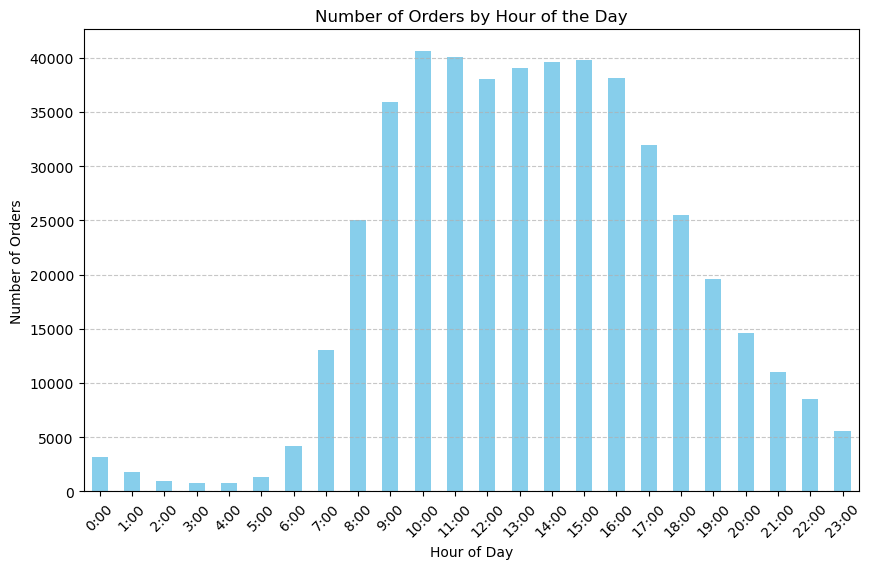

In [269]:
# Plot the number of orders by hour of the day
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24), [f"{hour}:00" for hour in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*POSSIBLE INSIGHTS*: 

**Peak Shopping Hours**: Orders peak between 6 PM and 10 PM, this identifies the a high shopping period. 

**Off-Peak Hours**: Hours with the lowest order counts might indicate times when people are less likely to shop for groceries. 

### What day of the week do people shop for groceries?

Number of orders by day of the week:
day_name
Friday       63488
Monday       82185
Saturday     62649
Sunday       84090
Thursday     59810
Tuesday      65833
Wednesday    60912
Name: count, dtype: int64


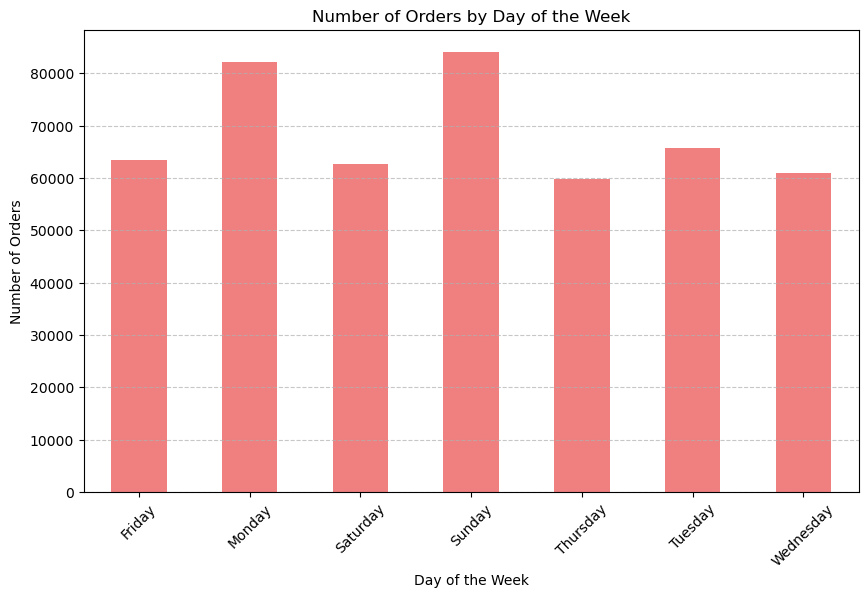

In [272]:
# Map days of the week to names
day_names = {
    0: 'Sunday', 
    1: 'Monday', 
    2: 'Tuesday', 
    3: 'Wednesday', 
    4: 'Thursday', 
    5: 'Friday', 
    6: 'Saturday'
}
orders_df['day_name'] = orders_df['order_dow'].map(day_names)
# Count the number of orders placed on each day of the week
day_counts = orders_df['day_name'].value_counts().sort_index()
print("Number of orders by day of the week:")
print(day_counts)


plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='lightcoral')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*POSSIBLE INSIGHTS*: 

**Peak Shopping Days**: Monday and Sunday have the highest counts, which indicates these are popular shopping days. 

**Less Busy Days**: Thursday and Wednesday indicate orders might be less popular for shopping. 

### How long do people wait until placing another order?

Missing values in 'days_since_prior_order': 0

Basic statistics for 'days_since_prior_order':
count    478967.000000
mean         10.433769
std           9.292125
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


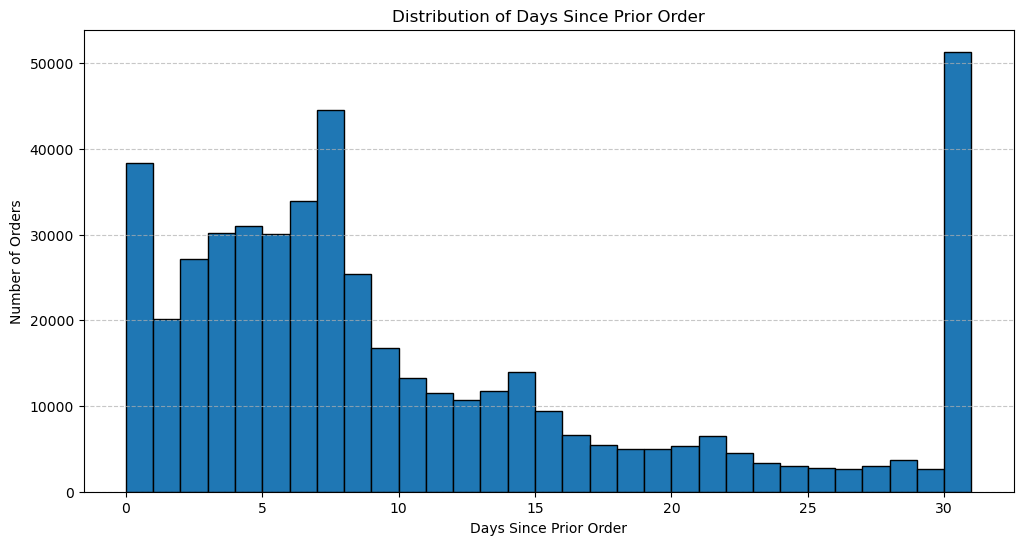

In [275]:
# Check for missing values in 'days_since_prior_order'
print("Missing values in 'days_since_prior_order':", orders_df['days_since_prior_order'].isna().sum())

# Convert 'days_since_prior_order' to numeric if not already
orders_df['days_since_prior_order'] = pd.to_numeric(orders_df['days_since_prior_order'], errors='coerce')

# Basic statistics
print("\nBasic statistics for 'days_since_prior_order':")
print(orders_df['days_since_prior_order'].describe())

plt.figure(figsize=(12, 6))
plt.hist(orders_df['days_since_prior_order'], bins=range(0, int(orders_df['days_since_prior_order'].max()) + 2), edgecolor='black')
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*POSSIBLE INSIGHTS*: 

**Distribution Pattern**: 

The distribution is right-skewed, meaning that while most orders are placed relatively frequently (around the median of 7 days) there is along tail of orders with much longer gaps.  This suggests that while the majority of customers order with relatively short intervals, a smaller segment orders much less frequently. 

**Statistical Measures**: 

*Count*: Total number of orders in the dataset that have non-missing values for 'days_since_prior_order'.

*Mean*: On average, customers wait about 10.43 days before placing another order. 

*Standard Devitation (std)*: 9.29 indicates the waiting times typically vary by about 9.29 days from the average. A higher standard devitation suggests greater variability in waiting times. 

*Minimum*: The shortest time between orders is 0 days, meaning some customers place orders on consecutive days.

*25th Percentile*: 25% of the orders have a waiting time of 4 days or fewer.

*Median* (50%): Half of the orders have a waiting time of 7 days or fewer.

*75th Percentile (75%)*: 75% of the orders have a waiting time of 15 days or fewer.

*Maximum*: The longest time between orders is 30 days. 

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [281]:
# Filter data for Wednesdays and Saturdays
wednesday_data = orders_df_cleaned[orders_df_cleaned['order_dow'] == 2]['order_hour_of_day']
saturday_data = orders_df_cleaned[orders_df_cleaned['order_dow'] == 5]['order_hour_of_day']

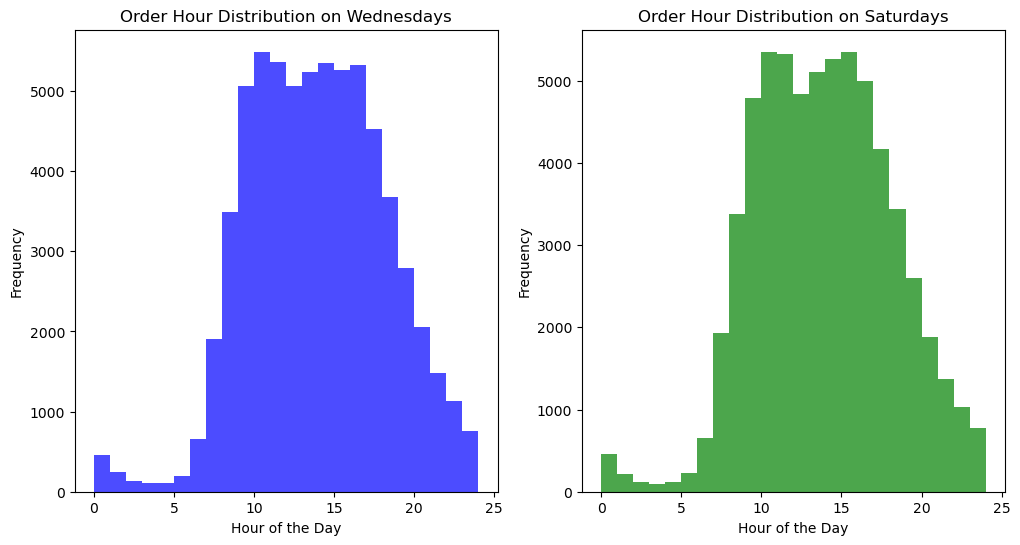

In [283]:
# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for Wednesdays
plt.subplot(1, 2, 1)
plt.hist(wednesday_data, bins=24, range=(0, 24), alpha=0.7, color='blue')
plt.title('Order Hour Distribution on Wednesdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

# Histogram for Saturdays
plt.subplot(1, 2, 2)
plt.hist(saturday_data, bins=24, range=(0, 24), alpha=0.7, color='green')
plt.title('Order Hour Distribution on Saturdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

plt.show()

*DIFFERENCES*:
   
  **Peak Hours**: Check is specific hours of the day where orders peak differently on Wednesdays compares to Saturdays. 
  
  **Distribution Shape**: Compaire the distribution, if orders on Wednesdqay are more uniformly distributed throughout the day, while Saturdays have distrinct peaks, this could indicate different shoppingn behaivor on weekends versus weekdays. 
  
  **Variability**: Assess the spread of the distributions. If one day has a broader range of order hours with more variablity, this might suggest less consistent ordering times. 
   
  **Overall Frequency**: If one day has significantly more orders or a different pattern, this could be due to user behavior variations on different days of the week. 
  
**Wednesdays**: Orders might be more concentrated around mid-day, with a peak around lunchtime hours.

**Saturdays**: Orders might show a higher frequency in the late afternoon and evening, reflecting typical weekend shopping behavior.

### What's the distribution for the number of orders per customer?

In [286]:
# Group by 'user_id' and count the number of orders
orders_per_customer = orders_df_cleaned.groupby('user_id').size()


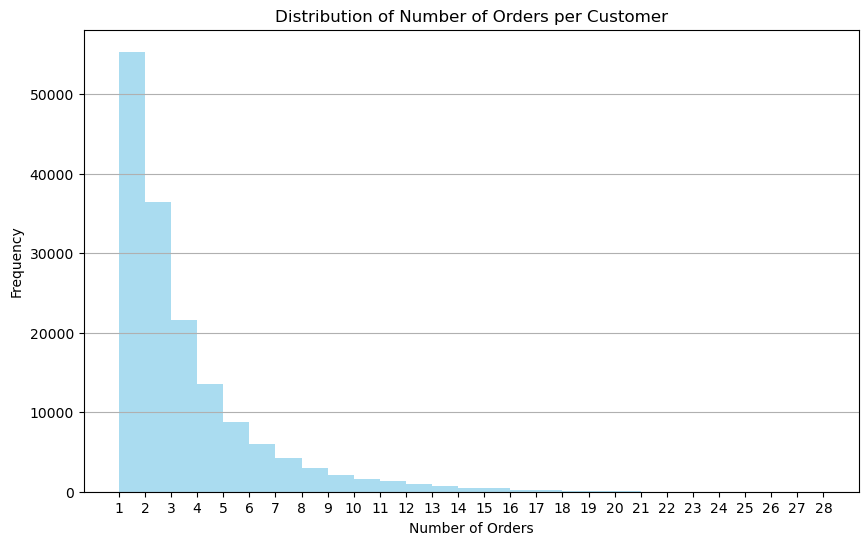

In [288]:
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max() + 1), alpha=0.7, color='skyblue')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.xticks(range(1, orders_per_customer.max() + 1))
plt.grid(axis='y')
plt.show()

**Central Tendency**: The peak of the histogram indicates the most common number of orders per customer.

**Spread**: A wide spread with many bins filled suggests that there is a significant variance in the number of orders customers make.

**Skewness**: Tere are a lot of customers with only one or two orders and a few customers with many orders, the distribution will be right-skewed.

**Outliers**: There are no outliers identified.

### What are the top 20 popular products (display their id and name)?

In [291]:
top_20_products = products_df_cleaned.head(20)
print(top_20_products[['product_id', 'product_name']])

    product_id                                       product_name
0            1                         Chocolate Sandwich Cookies
1            2                                   All-Seasons Salt
2            3               Robust Golden Unsweetened Oolong Tea
3            4  Smart Ones Classic Favorites Mini Rigatoni Wit...
4            5                          Green Chile Anytime Sauce
5            6                                       Dry Nose Oil
6            7                     Pure Coconut Water With Orange
7            8                  Cut Russet Potatoes Steam N' Mash
8            9                  Light Strawberry Blueberry Yogurt
9           10     Sparkling Orange Juice & Prickly Pear Beverage
10          11                                  Peach Mango Juice
11          12                         Chocolate Fudge Layer Cake
12          13                                  Saline Nasal Mist
13          14                     Fresh Scent Dishwasher Cleaner
14        

In [293]:
# Group by Product and Count occurrences of each product 
product_counts = products_df_cleaned.groupby('product_id').size()
product_counts

product_id
1        1
2        1
3        1
4        1
5        1
        ..
49690    1
49691    1
49692    1
49693    1
49694    1
Length: 49694, dtype: int64

In [295]:
# Sort products by count and get top 20
top_20_products = product_counts.sort_values(ascending=False).head(20).reset_index(name='count')
top_20_products

,product_id,count
0,1,1
1,33146,1
2,33124,1
3,33125,1
4,33126,1
5,33127,1
6,33128,1
7,33129,1
8,33130,1
9,33131,1


In [297]:
# Merge with product names for display
top_20_products = top_20_products.merge(products_df_cleaned[['product_id', 'product_name']].drop_duplicates(), on='product_id')

In [299]:
# Display top 20 products
print(top_20_products[['product_id', 'product_name']])

    product_id                                      product_name
0            1                        Chocolate Sandwich Cookies
1        33146                              Revolt Killer Citrus
2        33124  Healthy Kids Organic Chocolate Nutritional Shake
3        33125              Organic Mini Cheddar Cheese Crackers
4        33126                                  Sesame Flatbread
5        33127                        No Salt Roasted Pistachios
6        33128                         Riccardo Balsamic Vinegar
7        33129                                    Classic Hummus
8        33130      Organic Salt Free Cabbage Dill Raw Sauerkrat
9        33131                        Hair Remover Wax Strip Kit
10       33132                               Mild Red Taco Sauce
11       33133          Rising Crust Spicy Italian Sausage Pizza
12       33134                      Orange Recovery Energy Drink
13       33135                           Organic Blueberry Kefir
14       33136           

### How many items do people typically buy in one order? What does the distribution look like?

In [304]:
order_products_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [308]:
# Impute missing values in 'add_to_cart_order' with the column's median
median_value = order_products_df['add_to_cart_order'].median()
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(median_value)


In [310]:
# Drop rows where 'add_to_cart_order' is missing
order_products_df.dropna(subset=['add_to_cart_order'], inplace=True)

In [312]:
# Convert 'add_to_cart_order' to integer
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)

In [314]:
# Calculate the number of items per order
items_per_order = order_products_df.groupby('order_id').size()
items_per_order

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Length: 450046, dtype: int64

In [315]:
# Summary statistics
summary_stats = items_per_order.describe()

print("Summary Statistics for Number of Items per Order:")
print(summary_stats)

Summary Statistics for Number of Items per Order:
count    450046.000000
mean         10.097126
std           7.523747
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max          64.000000
dtype: float64


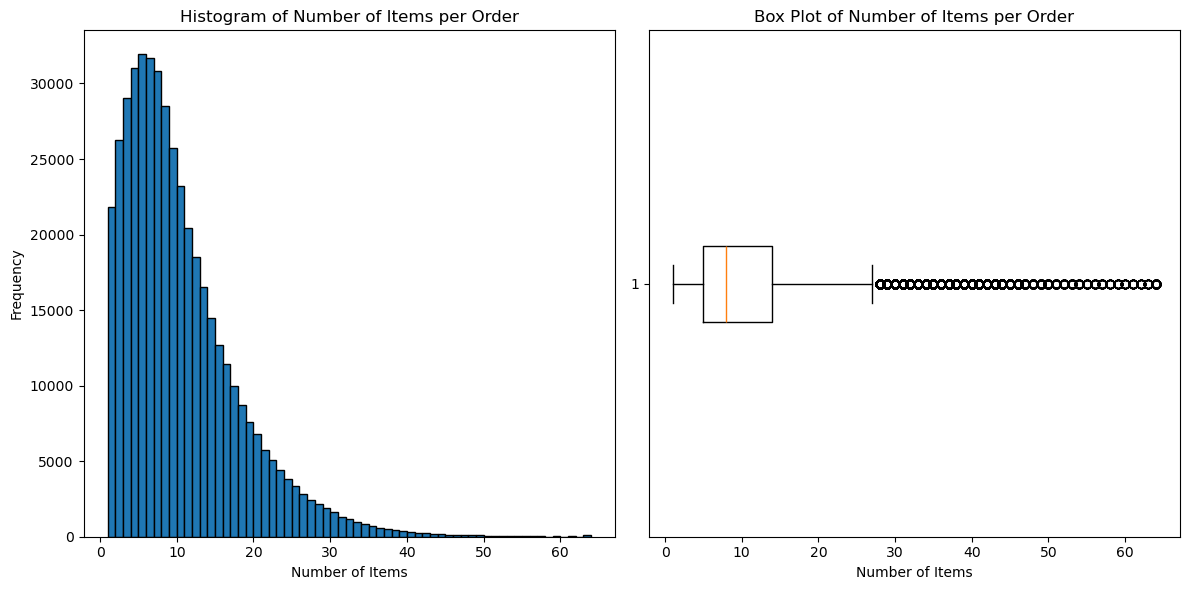

In [318]:
# Plot the distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(items_per_order, bins=range(1, items_per_order.max() + 1), edgecolor='black')
plt.title('Histogram of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
plt.boxplot(items_per_order, vert=False)
plt.title('Box Plot of Number of Items per Order')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()

*POSSIBLE INSIGHTS*

Typical order size, on average, customers buy about 4 itmes per order, but the median suggests that the majority of orders are slightly smaller, around 3 itmes. The large standard devitation (5.1) indicates that there is a significant amount of varibility in order sizes. The historgram might show that orders tends to cluster around a certain size but with a long tail indicating that some order are much larger. The box plot might reveal several outliers with unusally high numbers of items. 

### What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [322]:
# Filter to include only reordered items
reordered_items = order_products_df[order_products_df['reordered'] == 1]
reordered_items

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [324]:
# Count the number of reorders for each product
reorder_counts = reordered_items.groupby('product_id').size()
reorder_counts

product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Length: 36227, dtype: int64

In [326]:
# Convert the series to a DataFrame for better handling
reorder_counts_df = reorder_counts.reset_index(name='reorder_count')
reorder_counts_df

,product_id,reorder_count
0,1,158
1,3,31
2,4,25
3,7,1
4,8,6
...,...,...
36222,49690,4
36223,49691,31
36224,49692,5
36225,49693,11


In [328]:
# Sort the DataFrame by reorder_count in descending order
reorder_counts_df = reorder_counts_df.sort_values(by='reorder_count', ascending=False)
reorder_counts_df

,product_id,reorder_count
18103,24852,55761
9527,13176,44448
15367,21137,28637
15935,21903,26232
34406,47209,23628
...,...,...
12398,17085,1
20794,28543,1
16424,22554,1
8285,11465,1


In [330]:
# Get the top 20 reordered products
top_20_reordered = reorder_counts_df.head(20)
top_20_reordered

,product_id,reorder_count
18103,24852,55761
9527,13176,44448
15367,21137,28637
15935,21903,26232
34406,47209,23628
34827,47766,18743
20284,27845,16251
34724,47626,15044
20374,27966,14747
12192,16797,13944


### For each product, what proportion of its orders are reorders?

In [337]:
# Calculate the total number of orders for each product
total_orders_per_product = order_products_df.groupby('product_id').size()

In [339]:
# Calculate the number of reorders for each product
reorders_per_product = order_products_df[order_products_df['reordered'] == 1].groupby('product_id').size()

In [340]:
# Convert the series to DataFrames for merging
total_orders_df = total_orders_per_product.reset_index(name='total_orders')
reorders_df = reorders_per_product.reset_index(name='reorders')

In [343]:
# Merge the total orders and reorders DataFrames
product_stats = pd.merge(total_orders_df, reorders_df, on='product_id', how='left')

In [349]:
# Fill NaN values in 'reorders' with 0 (for products that have no reorders)
product_stats['reorders'] = product_stats['reorders'].fillna(0)


In [351]:
# Calculate the proportion of reorders
product_stats['proportion_reordered'] = product_stats['reorders'] / product_stats['total_orders']

In [353]:
product_stats[['product_id', 'total_orders', 'reorders', 'proportion_reordered']]

,product_id,total_orders,reorders,proportion_reordered
0,1,280,158.0,0.564286
1,2,11,0.0,0.000000
2,3,42,31.0,0.738095
3,4,49,25.0,0.510204
4,7,2,1.0,0.500000
...,...,...,...,...
45567,49690,5,4.0,0.800000
45568,49691,72,31.0,0.430556
45569,49692,12,5.0,0.416667
45570,49693,25,11.0,0.440000


### For each customer, what proportion of their products ordered are reorders?

In [357]:
# Calculate the total number of orders and reorders for each customer
total_orders_per_customer = order_products_df.groupby('order_id').size()  # Total items per order
total_orders_per_customer = total_orders_per_customer.groupby(order_products_df['order_id']).sum()  # Total items per customer

reorders_per_customer = order_products_df[order_products_df['reordered'] == 1].groupby('order_id').size()
reorders_per_customer = reorders_per_customer.groupby(order_products_df['order_id']).sum()  # Total reorders per customer

In [359]:
# Convert the Series to DataFrames for merging
total_orders_df = total_orders_per_customer.reset_index(name='total_orders')
reorders_df = reorders_per_customer.reset_index(name='reorders')

In [361]:
# Merge the total orders and reorders DataFrames
customer_stats = pd.merge(total_orders_df, reorders_df, on='order_id', how='left')

In [367]:
# Fill NaN values in 'reorders' with 0 (for customers with no reorders)
customer_stats['reorders'] = customer_stats['reorders'].fillna(0)

In [369]:
# Calculate the proportion of reorders
customer_stats['proportion_reordered'] = customer_stats['reorders'] / customer_stats['total_orders']

In [371]:
customer_stats[['order_id', 'total_orders', 'reorders', 'proportion_reordered']]

,order_id,total_orders,reorders,proportion_reordered
0,4.0,23,14.0,0.608696
1,9.0,9,8.0,0.888889
2,11.0,6,0.0,0.000000
3,31.0,18,14.0,0.777778
4,48.0,3,1.0,0.333333
...,...,...,...,...
254275,3421001.0,13,9.0,0.692308
254276,3421013.0,15,7.0,0.466667
254277,3421018.0,19,8.0,0.421053
254278,3421053.0,7,7.0,1.000000


### What are the top 20 items that people put in their carts first? 

In [374]:
# Sort the DataFrame by 'order_id' and 'add_to_cart_order'
sorted_df = order_products_df.sort_values(by=['order_id', 'add_to_cart_order'])

In [375]:
# Get the first item for each order
first_items = sorted_df.groupby('order_id').first().reset_index()

In [376]:
# Count the frequency of each product being the first item
first_item_counts = first_items['product_id'].value_counts()

In [377]:
# Convert to DataFrame for better handling
first_item_counts_df = first_item_counts.reset_index(name='count')
first_item_counts_df.columns = ['product_id', 'count']

In [382]:
top_20_first_items = first_item_counts_df.head(20)
top_20_first_items

,product_id,count
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


# CONCLUSION


In conclusion, each analysis provides valuable insights into customer behavior, shopping patterns, and product preferences, helping to understand and optimize the shopping experience. For example, with peak order volumes occurring between 6 PM and 10 PM, underscoring this time frame as a key period for grocery sales. Conversely, the identified off-peak hours with lower order counts suggest these are less favorable times for shopping. The insights can be leveraged for targeted marketing, better inventory management, and optimizing customer experience.  Understanding these trends can help optimize staffing, inventory management, and marketing strategies to better align with customer activity and maximize efficiency.